<a href="https://colab.research.google.com/github/Katleho10/Loan-prediction/blob/main/Loan_prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of contents
1. Defining the problem statement
2. Imports
3. Exploratory data analysis
4. Data preparation for model building
5. Saving the model 


### 1. Defining the problem statement
A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Machine learning tools will be used to predict which clients will qualify or not 

In [ ]:
import numpy as np                        # For Mathematical calculations      
import pandas as pd                       # Helps to analyse data  
import seaborn as sns                     # For data visualisation
from matplotlib import pyplot as plt      # For plotting graphs
%matplotlib inline
import sweetviz

import warnings
warnings.filterwarnings('ignore')         #Ignoring warnings

### 2.Importing librabries

In [ ]:
# Load dataset 
train = pd.read_csv('train_loan.csv')
test = pd.read_csv('test_loan.csv')
sample_submission = pd.read_csv('sample_submission_loan.csv') 
variable_definitions=pd.read_csv('variable_definitions.csv')

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
# You can see the number of missing values like this
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
# We use info() method to see more information of our train dataset.
#Rows & Values we have
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### 3. Exploratory data analysis

In [ ]:
# Let's see some descriptive statistics from built in the pandas library function describe
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Description of each variable

* Loan_ID:	Unique Loan ID
* Gender:	Male/ Female
* Married:	Applicant married (Y/N)
* Dependents:	Number of dependents
* Education:	Applicant Education (Graduate/ Under Graduate)
* Self_Employed:	Self employed (Y/N)
* ApplicantIncome:	Applicant income
* CoapplicantIncome:	Coapplicant income
* LoanAmount:	Loan amount in thousands
* Loan_Amount_Term:	Term of loan in months
* Credit_History:	credit history meets guidelines
* Property_Area:	Urban/ Semi Urban/ Rural
* Loan_Status:	Loan approved (Y/N)

In [ ]:
# Different data types in the dataset
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
my_report = sweetviz.compare_intra(train, train["Gender"] == 'Male', ["Male", "Female"], 'Loan_Status')
my_report.show_html() # Not providing a filename will default to SWEETVIZ_REPORT.html

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report.show_html("Report.html", open_browser=False)

Report Report.html was generated.



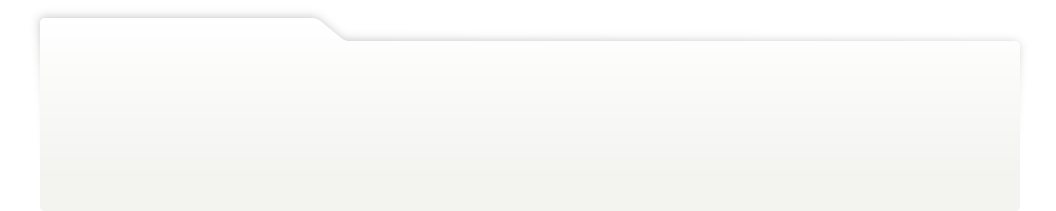
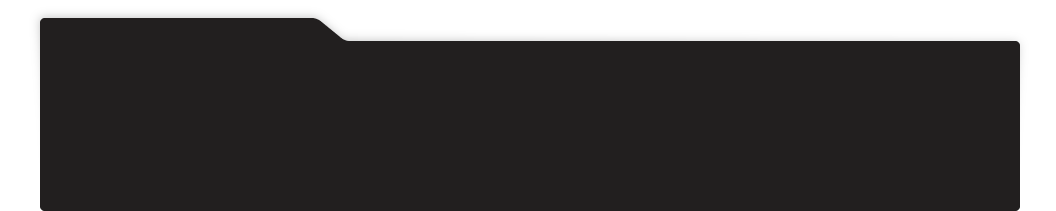
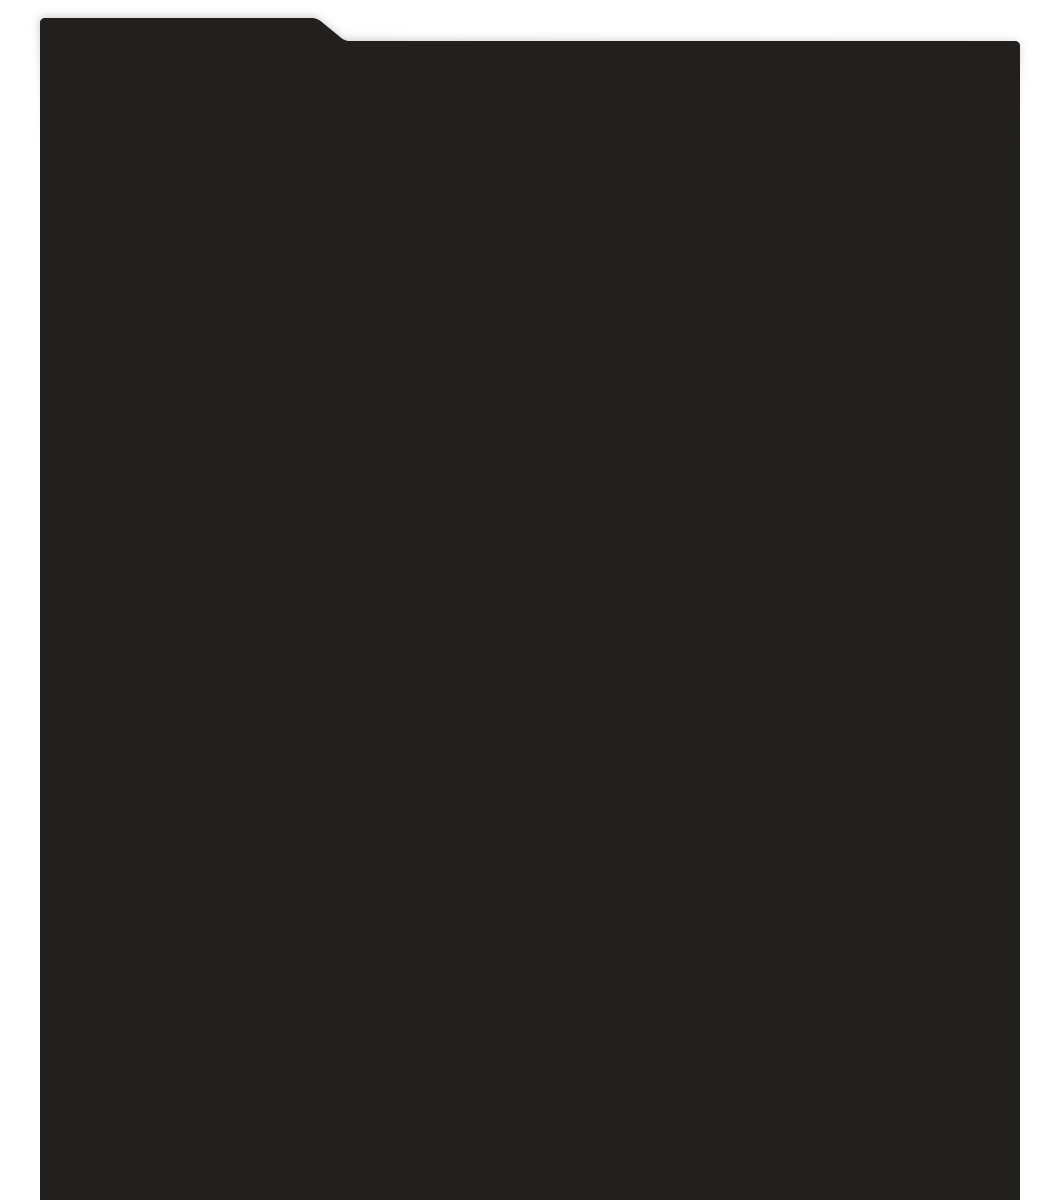
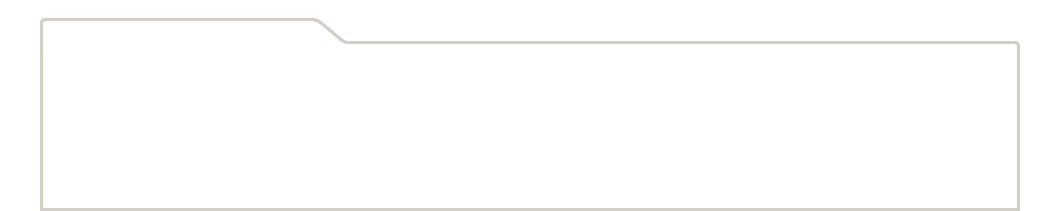
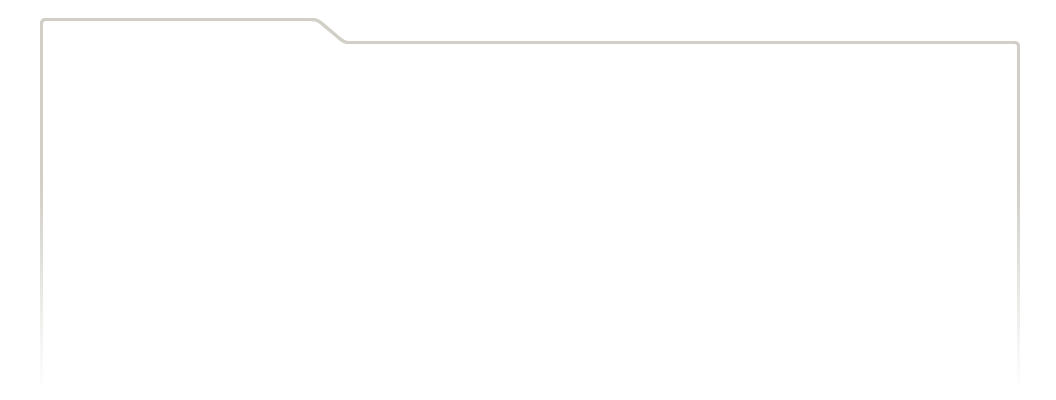
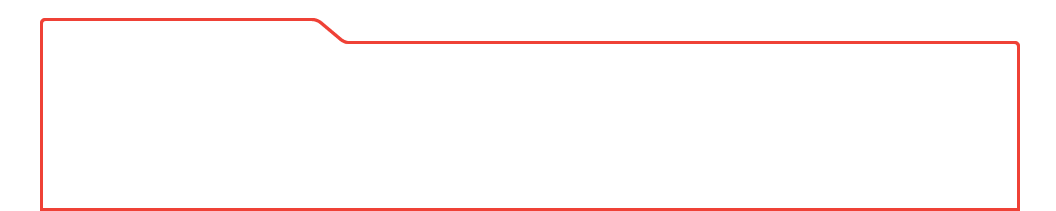
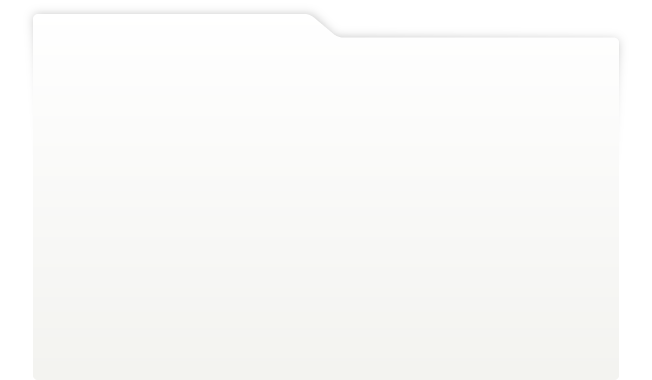
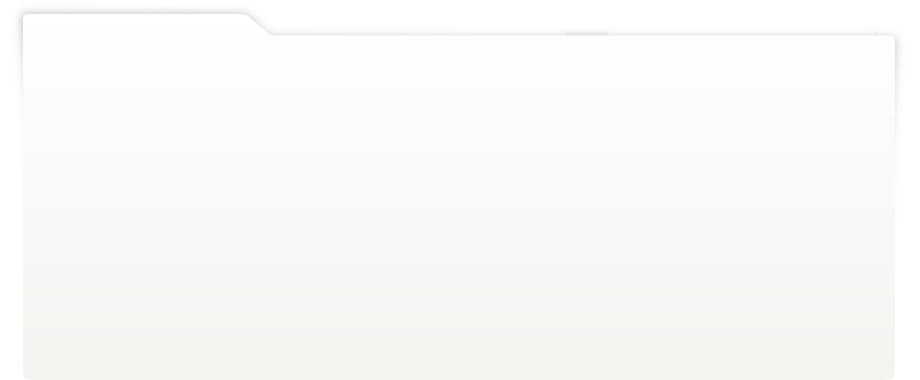
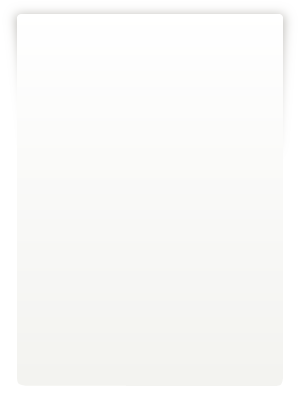
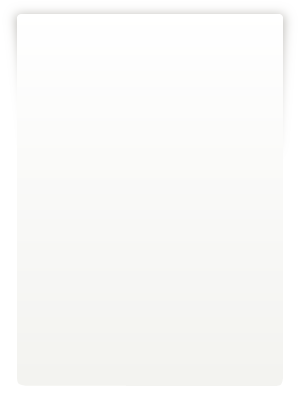
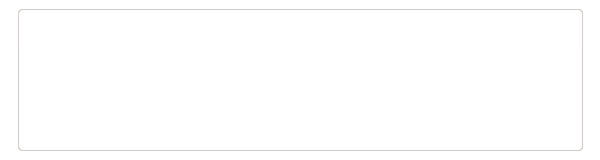
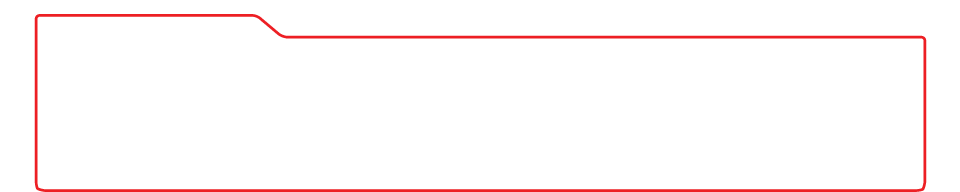
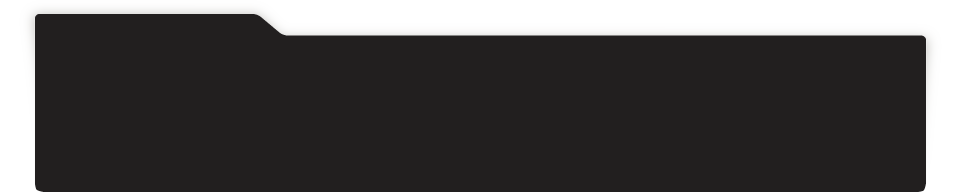
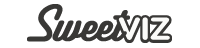
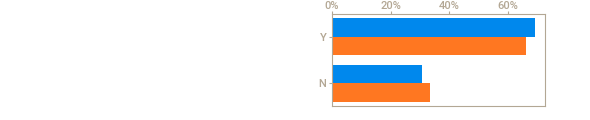
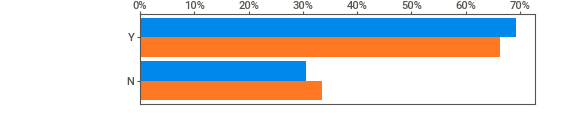
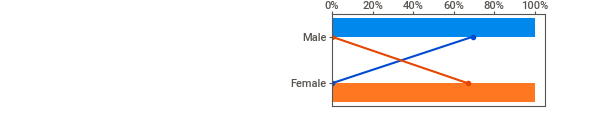
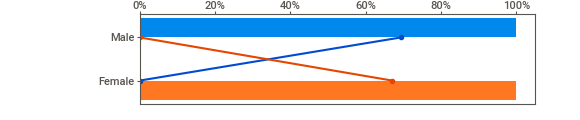
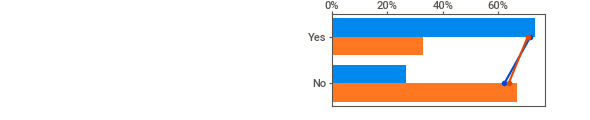
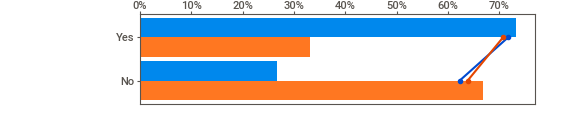
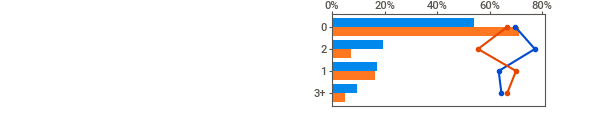
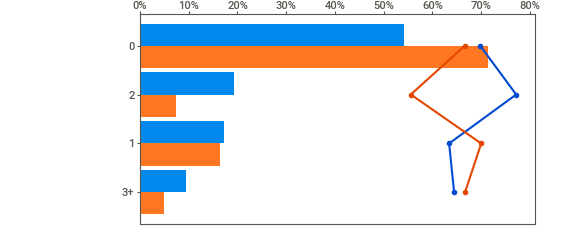
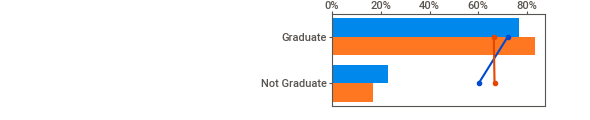
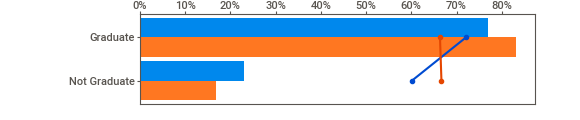
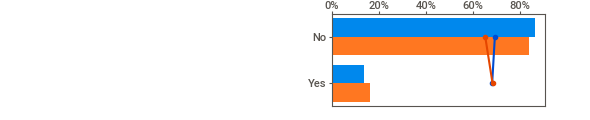
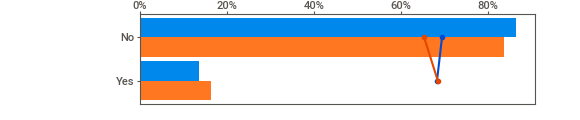
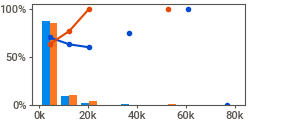
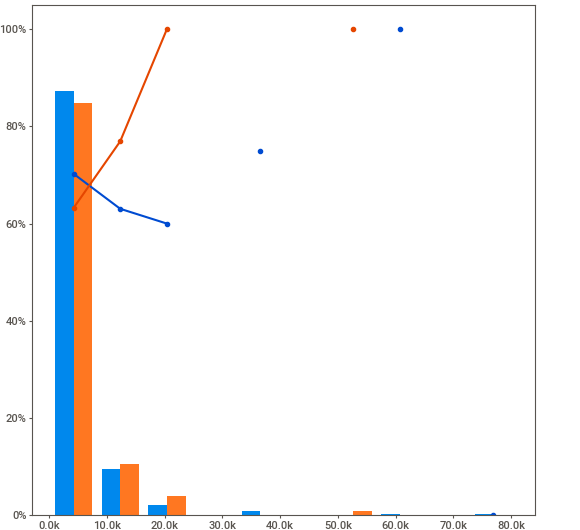
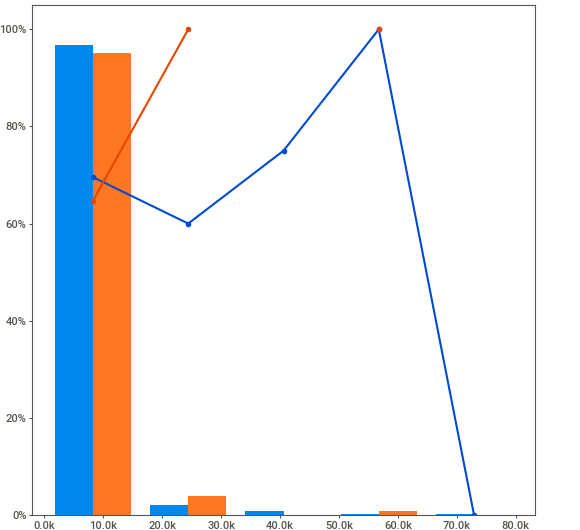
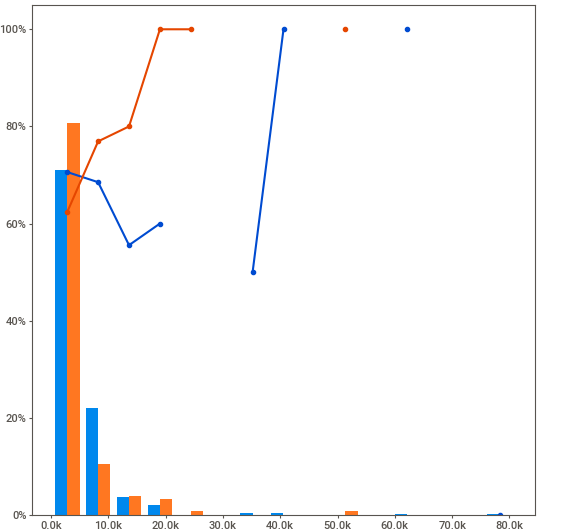
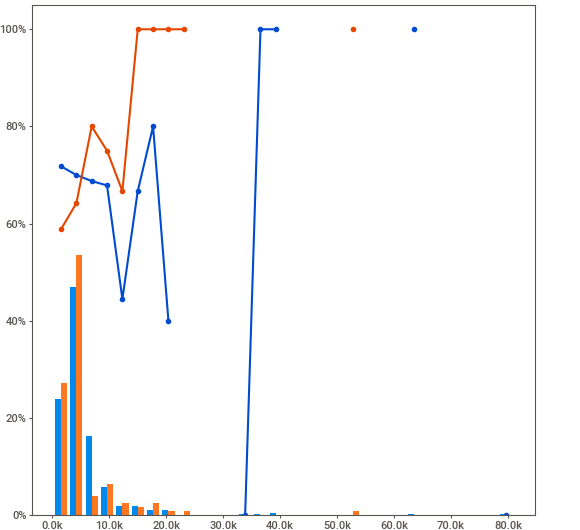
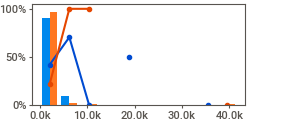
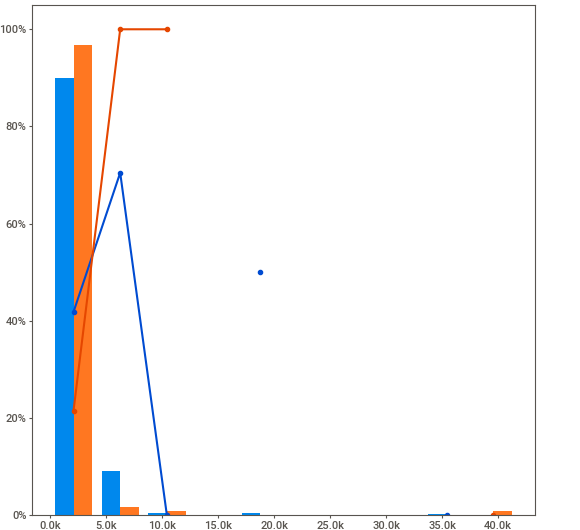
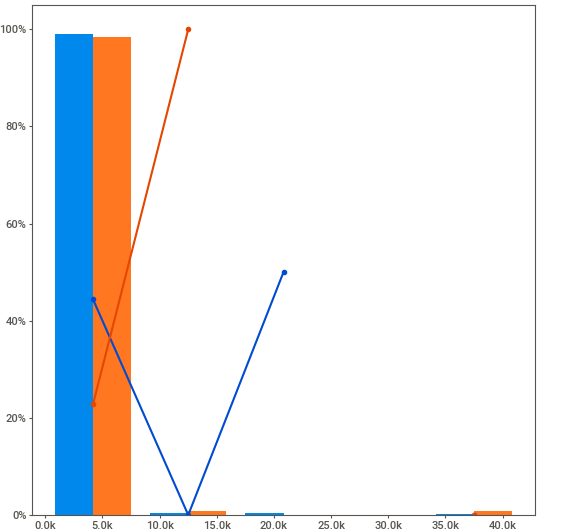
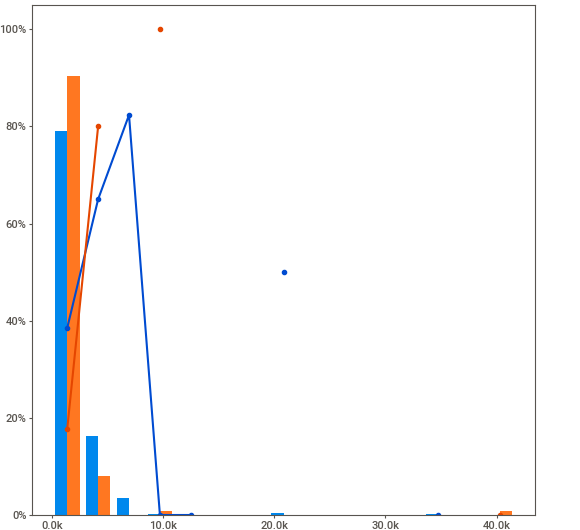
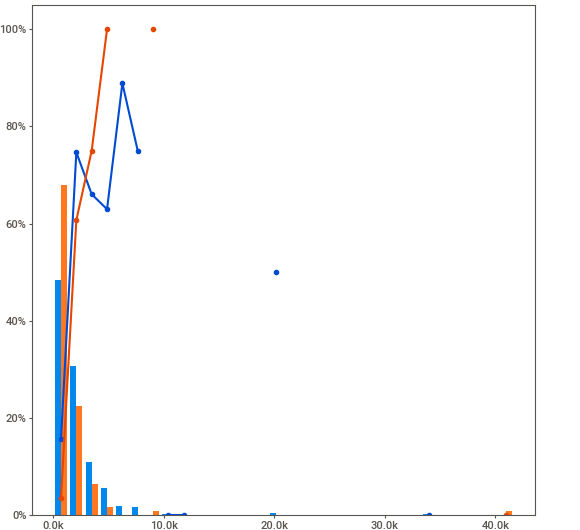
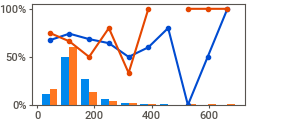
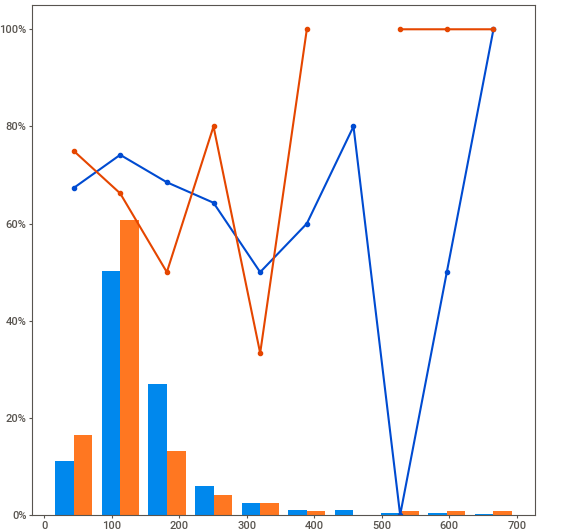
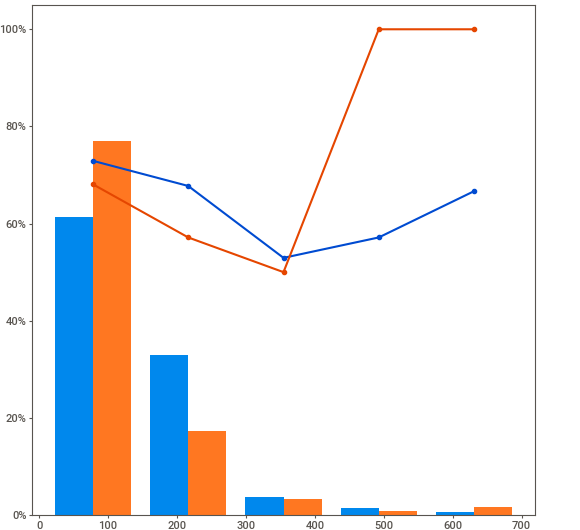
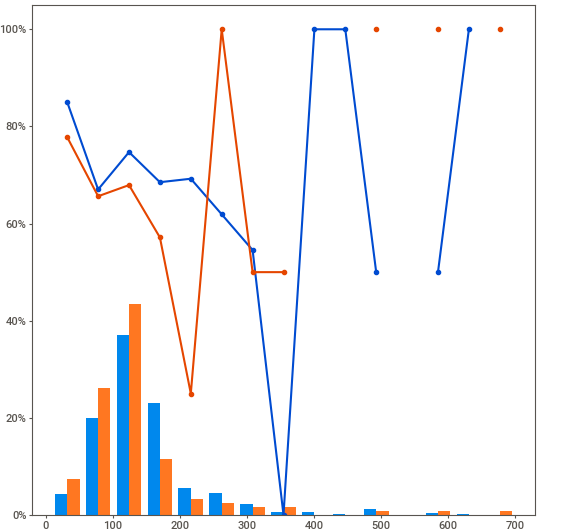
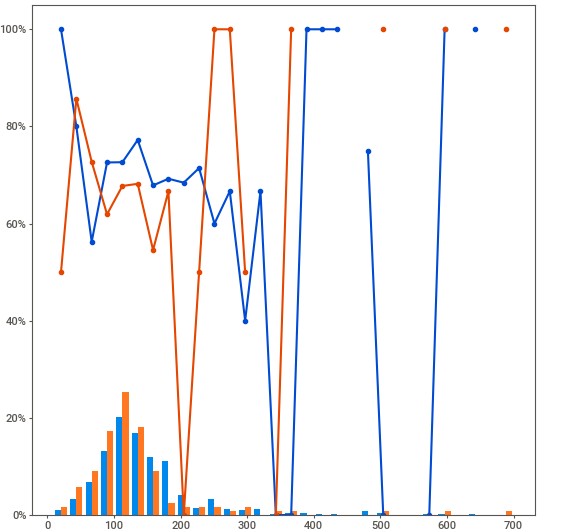
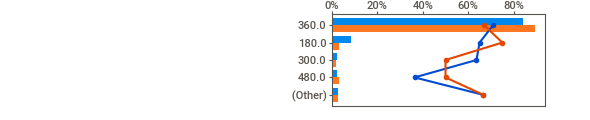
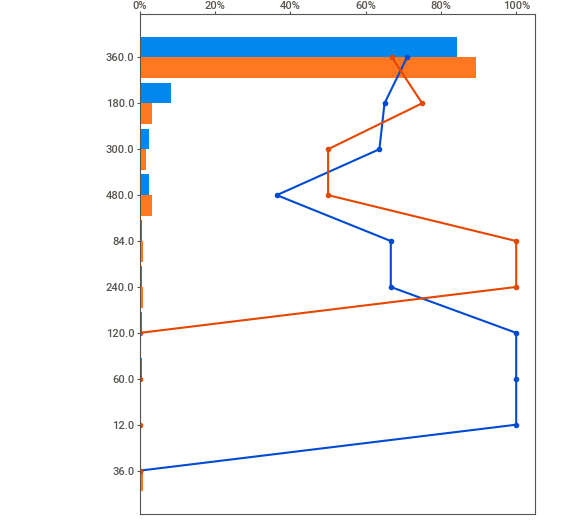
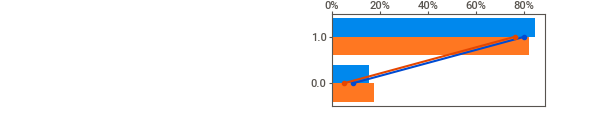
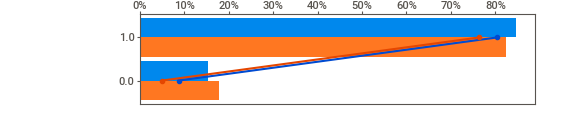
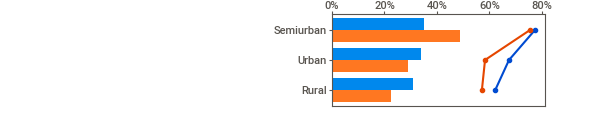
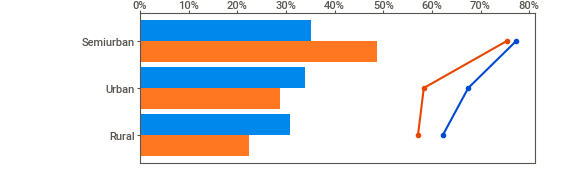
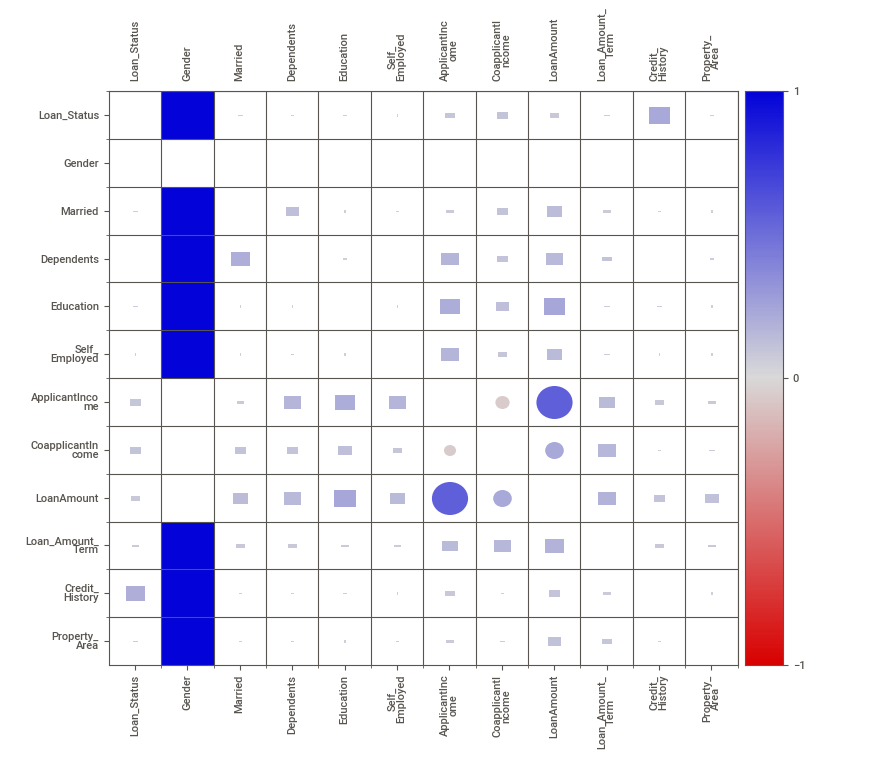
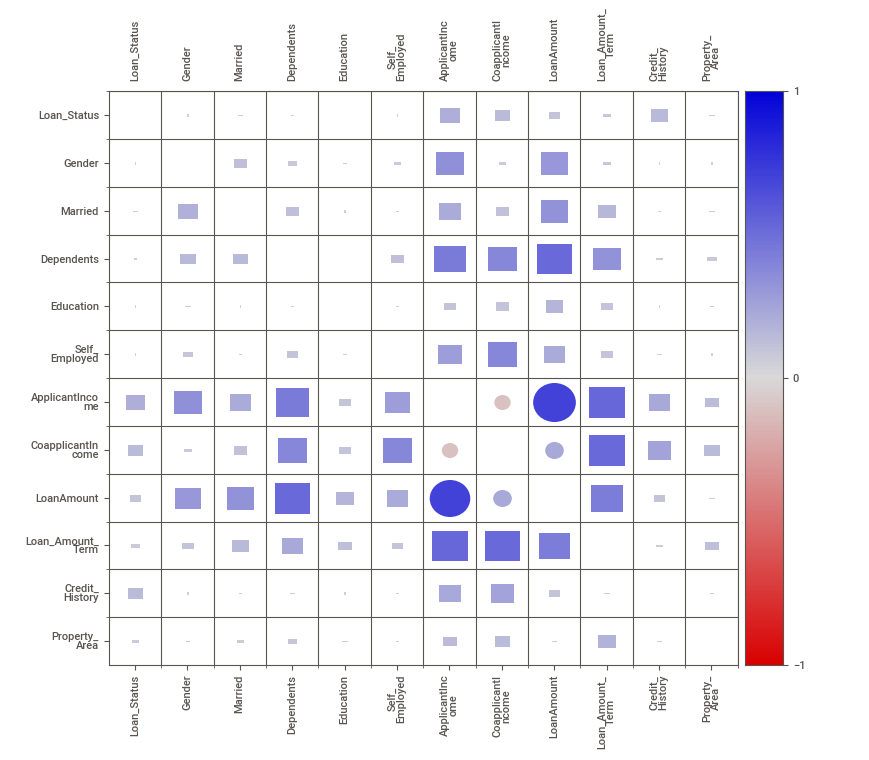

In [ ]:
import IPython
IPython.display.HTML("Report.html")

In [ ]:
#Heatmap

Heatmap will be used to visualise correlation between numerical values.
* The variables with darker colour means their correlation is more

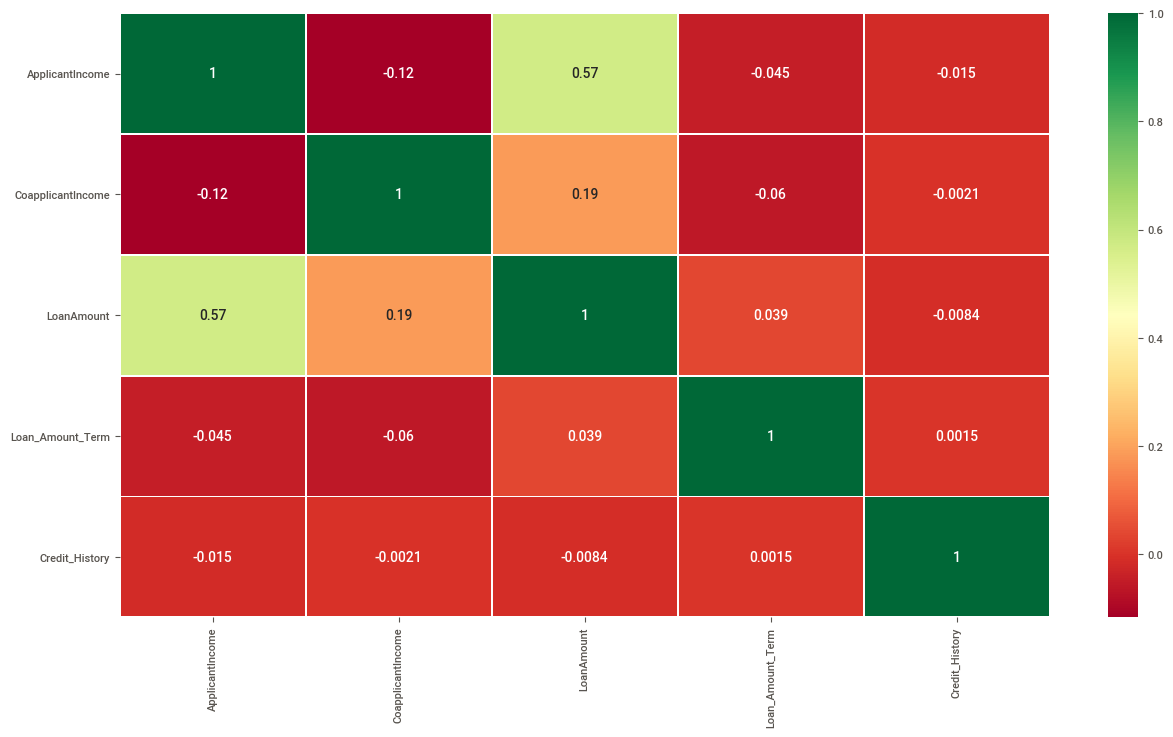

In [ ]:
sns.heatmap(train.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

* Heat map shows that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status)
* LoanAmount is also correlated with CoapplicantIncome 

In [ ]:
#Dropping loan ID because it has no effecton loan status
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

### 4.Imputing categorical variables

In [ ]:
train['Gender']= train['Gender'].map({'Male':0, 'Female':1})
train['Married']= train['Married'].map({'No':0, 'Yes':1})
train['Loan_Status']= train['Loan_Status'].map({'N':0, 'Y':1})

### 5.Data preparation for model building

In [ ]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train = train.dropna()
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
X = train[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train.Loan_Status
X.shape, y.shape

((480, 5), (480,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8020833333333334

In [ ]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.8203125

### 5.Saving the model 

In [ ]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()